In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import plotly.graph_objects as go

In [50]:
# set number of columns in  pandas output
pd.set_option('display.max_columns', 100)

Data obtained from https://cancer.sanger.ac.uk/cosmic/download/cancer-mutation-census/v99/alldata-cmc under "Cancer Mutation Census". Downloaded CancerMutationCensus_AllData_Tsv_v99_GRCh37.tar

In [51]:
# df = pd.read_csv('cmc_export.tsv', sep='\t', nrows=100) # read first 100 rows
df = pd.read_csv('cmc_export.tsv', sep='\t', usecols=['GENE_NAME', 'ONC_TSG','AA_MUT_START', 'AA_MUT_STOP', 'AA_WT_ALLELE_SEQ', 'AA_MUT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA', 'MUTATION_SIGNIFICANCE_TIER'])
df

C:\Users\liyoa\AppData\Local\Temp\ipykernel_25108\2720823258.py:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



,GENE_NAME,ONC_TSG,Mutation AA,AA_MUT_START,AA_MUT_STOP,AA_WT_ALLELE_SEQ,AA_MUT_ALLELE_SEQ,Mutation Description AA,MUTATION_SIGNIFICANCE_TIER
0,PODN,NaN,p.N296K,296,296,N,K,Substitution - Missense,Other
1,PODN,NaN,p.R211C,211,211,R,C,Substitution - Missense,Other
2,PODN,NaN,p.L312=,312,312,L,L,Substitution - coding silent,Other
3,PODN,NaN,p.I380Sfs*55,380,380,I,SAAWSTCCCTATSCGSRASTHWPSRASSGCTRCTCTTTRWSACPVA...,Deletion - Frameshift,Other
4,PODN,NaN,p.V412M,412,412,V,M,Substitution - Missense,Other
...,...,...,...,...,...,...,...,...,...
5225809,AC011308.1,NaN,p.G9D,9,9,G,D,Substitution - Missense,Other
5225810,RPS17L,NaN,p.E75G,75,75,E,G,Substitution - Missense,Other
5225811,RPS17L,NaN,p.R81S,81,81,R,S,Substitution - Missense,Other
5225812,FKSG68,NaN,p.Q74R,74,74,Q,R,Substitution - Missense,Other


Only focusing on single amino acid mutations...

In [52]:
df['ONC_TSG'].unique()

array([nan, 'TSG, fusion', 'oncogene, TSG', 'oncogene', 'TSG',
       'oncogene, fusion', 'fusion', 'oncogene, TSG, fusion'],
      dtype=object)

In [53]:
df['Mutation Description AA'].unique()

array(['Substitution - Missense', 'Substitution - coding silent',
       'Deletion - Frameshift', 'Substitution - Nonsense',
       'Deletion - In frame', 'Insertion - In frame',
       'Insertion - Frameshift', nan, 'Nonstop extension',
       'Complex - frameshift', 'Complex - deletion inframe', 'Frameshift',
       'Complex - insertion inframe'], dtype=object)

In [54]:
# all_mutations = pd.DataFrame()

tmp = df[(df['GENE_NAME'].isin(['KRAS', 'TP53', 'HRAS', 'EGFR'])) & \
(df['AA_MUT_START'] == df['AA_MUT_STOP'])]
tmp = tmp[['GENE_NAME' ,'ONC_TSG', 'AA_MUT_START', 'AA_WT_ALLELE_SEQ', 'AA_MUT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA', 'MUTATION_SIGNIFICANCE_TIER']].sort_values(by='AA_MUT_START')

# mutation not nan in AA_WT_ALLELE_SEQ	Mutation AA	Mutation Description AA
tmp = tmp.dropna(subset=['AA_WT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA'])
tmp


,GENE_NAME,ONC_TSG,AA_MUT_START,AA_WT_ALLELE_SEQ,AA_MUT_ALLELE_SEQ,Mutation AA,Mutation Description AA,MUTATION_SIGNIFICANCE_TIER
4784609,EGFR,oncogene,2,R,Q,p.R2Q,Substitution - Missense,Other
3547653,HRAS,oncogene,2,T,K,p.T2K,Substitution - Missense,Other
3547537,HRAS,oncogene,2,T,M,p.T2M,Substitution - Missense,Other
947774,KRAS,oncogene,2,T,I,p.T2I,Substitution - Missense,Other
947499,KRAS,oncogene,3,E,K,p.E3K,Substitution - Missense,Other
...,...,...,...,...,...,...,...,...
4784607,EGFR,oncogene,1204,S,R,p.S1204R,Substitution - Missense,Other
4783484,EGFR,oncogene,1205,S,N,p.S1205N,Substitution - Missense,Other
4784303,EGFR,oncogene,1207,F,C,p.F1207C,Substitution - Missense,Other
4783047,EGFR,oncogene,1208,I,F,p.I1208F,Substitution - Missense,Other


In [55]:
residue_data = pd.read_csv('../final_data.csv')
# residue_data = residue_data[residue_data['assoc_gene'] == gene]
residue_data.head()

,gene_symbol,pdb_id,chain,uniprot_id,assoc_gene,resolution,res_num,pdb_res,uniprot_res,network_score,outside_range,residue_match
0,EGFR,3POZ,A,P00533,EGFR,1.5,701,Q,Q,-3.791355,False,True
1,EGFR,3POZ,A,P00533,EGFR,1.5,702,A,A,-2.634055,False,True
2,EGFR,3POZ,A,P00533,EGFR,1.5,703,L,L,-1.231055,False,True
3,EGFR,3POZ,A,P00533,EGFR,1.5,704,L,L,0.452193,False,True
4,EGFR,3POZ,A,P00533,EGFR,1.5,705,R,R,-1.086163,False,True


In [56]:
# merge the two dataframes
tmp = tmp.merge(residue_data, left_on=['GENE_NAME', 'AA_MUT_START'], right_on=['assoc_gene', 'res_num'], how='left').sort_values(['GENE_NAME', 'AA_MUT_START'])
tmp.head(5)

,GENE_NAME,ONC_TSG,AA_MUT_START,AA_WT_ALLELE_SEQ,AA_MUT_ALLELE_SEQ,Mutation AA,Mutation Description AA,MUTATION_SIGNIFICANCE_TIER,gene_symbol,pdb_id,chain,uniprot_id,assoc_gene,resolution,res_num,pdb_res,uniprot_res,network_score,outside_range,residue_match
0,EGFR,oncogene,2,R,Q,p.R2Q,Substitution - Missense,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,EGFR,oncogene,4,S,PGRPGQRSWRCWLRSARRVGLWRKRKFAKARVTSSRSWALLKIIFS...,p.S4Pfs*76,Deletion - Frameshift,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,EGFR,oncogene,5,G,A,p.G5A,Substitution - Missense,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3758,EGFR,oncogene,13,A,T,p.A13T,Substitution - Missense,Other,EGFR,3VRP,B,P00533,EGFR,1.52,13.0,E,A,-3.805925,True,False
4490,EGFR,oncogene,13,A,E,p.A13E,Substitution - Missense,Other,EGFR,3VRP,B,P00533,EGFR,1.52,13.0,E,A,-3.805925,True,False


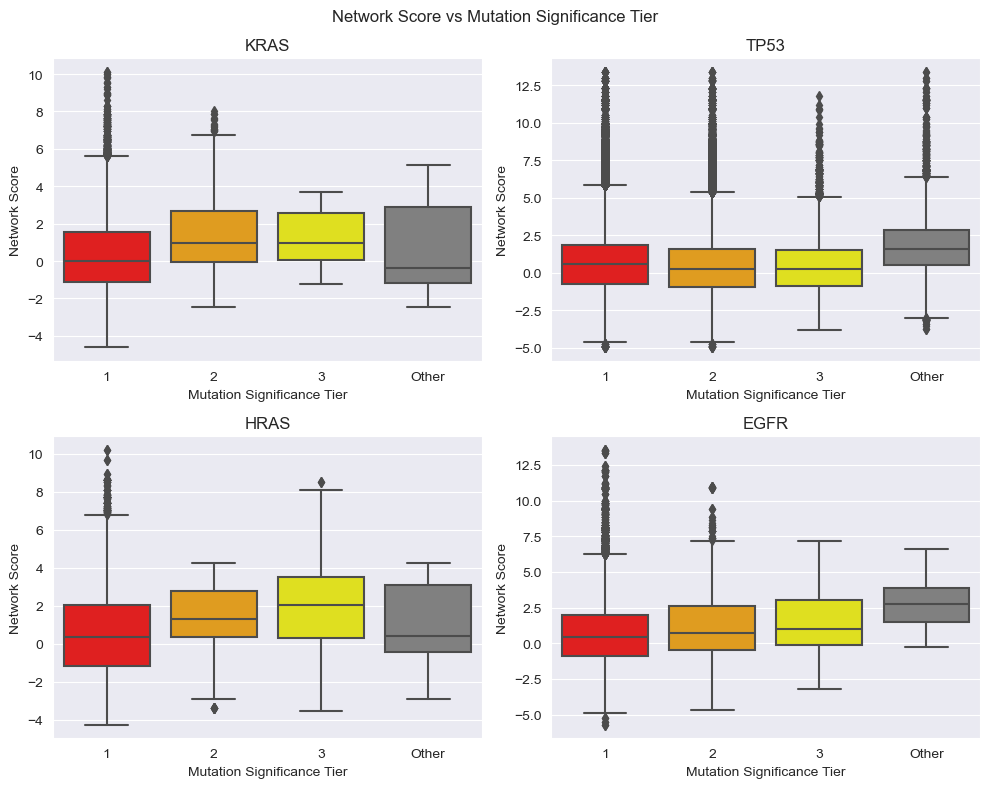

In [67]:
# Define color palette
colors = ['red', 'orange', 'yellow', 'grey']

# Plot boxplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i, gene in enumerate(['KRAS', 'TP53', 'HRAS', 'EGFR']):
    tmp_gene = tmp[tmp['GENE_NAME'] == gene]
    sns.boxplot(data=tmp_gene, x='MUTATION_SIGNIFICANCE_TIER', y='network_score',ax=ax[i//2, i%2], palette=colors)
    order = ['1', '2', '3', 'Other']
    ax[i//2, i%2].set_xticklabels(order)
    ax[i//2, i%2].set_title(gene)
    ax[i//2, i%2].set_ylabel('Network Score')
    ax[i//2, i%2].set_xlabel('Mutation Significance Tier')

plt.suptitle('Network Score vs Mutation Significance Tier')
plt.tight_layout()
plt.show()

* tier1 median network score around 0 for all 4.
* high network scores more likely to be tier 1 (except for TP53 which has mostly same distribution)